# Saabas Inconsistencies

This demonstrates the inconsistencies of Saabas values using multi-way AND functions.

In [1]:
import shap
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pl
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import graphviz

# Multi-way AND function

In [2]:
def multiwayand(display=False, and_size=2, extra_features=0):
    M = and_size + extra_features
    N = 2**M
    
    X = np.zeros((N,M))
    def rec(X, start, end, depth):
        if depth >= X.shape[1]: return
        half = (start + end) // 2
        X[start:half,depth] = 1
        rec(X, start, half, depth + 1)
        rec(X, half, end, depth + 1)
    rec(X, 0, N, 0)
    y = np.zeros(N)
    
    y[X[:,:and_size].sum(1) == and_size] = 1
    
    return X, y


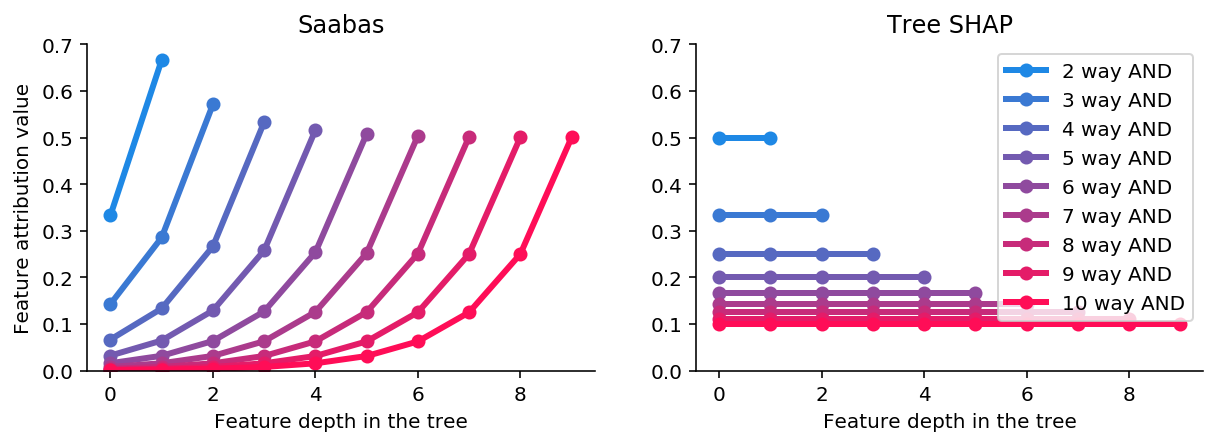

In [8]:
# fit model
saabas_values_arr = []
shap_values_arr = []
for i in range(2,11):
    X,y = multiwayand(and_size=i, extra_features=10-i)
    y[y == 0] = -y.sum()/(y == 0).sum()
    model = sklearn.tree.DecisionTreeRegressor(max_depth=i)
    model.fit(X, y)
    
#     print(y.mean())

    shap_values = shap.TreeExplainer(model).shap_values(X[0:1,:])
    shap_values_arr.append(shap_values)
    saabas_values = shap.TreeExplainer(model).shap_values(X[0:1,:], approximate=True)
    saabas_values_arr.append(saabas_values)
#     print(X[0,:])
#     print(shap.TreeExplainer(model).shap_values(X[0:1,:]))
#     print(shap.TreeExplainer(model).shap_values(X[0:1,:], approximate=True))

f = pl.figure(figsize=(10,3))
pl.subplot(1,2,1)
for i in range(len(saabas_values_arr)):
    pl.plot(
        list(range(0,i+2)), sorted(saabas_values_arr[i][0,:i+2]), ".-",
        markersize=12, label=str(i+2)+" way AND", linewidth=3,
        color=shap.plots.colors.red_blue_solid(i * 1.0/8)
    )
pl.ylabel("Feature attribution value")
pl.xlabel("Feature depth in the tree")
#pl.legend()
pl.gca().xaxis.set_ticks_position('bottom')
pl.gca().yaxis.set_ticks_position('left')
pl.gca().spines['right'].set_visible(False)
pl.gca().spines['top'].set_visible(False)
pl.ylim(0,0.7)
pl.title("Saabas")

pl.subplot(1,2,2) 
for i in range(len(shap_values_arr)):
    pl.plot(
        list(range(0,i+2)), sorted(shap_values_arr[i][0,:i+2]), ".-",
        markersize=12, label=str(i+2)+" way AND", linewidth=3,
        color=shap.plots.colors.red_blue_solid(i * 1.0/8)
    )
#pl.ylabel("SHAP feature attribution value")
pl.xlabel("Feature depth in the tree")
pl.legend()
pl.gca().xaxis.set_ticks_position('bottom')
pl.gca().yaxis.set_ticks_position('left')
pl.gca().spines['right'].set_visible(False)
pl.gca().spines['top'].set_visible(False)
pl.title("Tree SHAP")
pl.ylim(0,0.7)
#pl.colorbar()
pl.savefig("multiway_and.pdf")
pl.show()

# Multi-way OR function

In [4]:
def multiwayor(display=False, or_size=2, extra_features=0):
    M = or_size + extra_features
    N = 2**M
    
    X = np.zeros((N,M))
    def rec(X, start, end, depth):
        if depth >= X.shape[1]: return
        half = (start + end) // 2
        X[start:half,depth] = 1
        rec(X, start, half, depth + 1)
        rec(X, half, end, depth + 1)
    rec(X, 0, N, 0)
    y = np.zeros(N)
    y[X[:,:or_size].sum(1) > 0] = 1
    return X, y


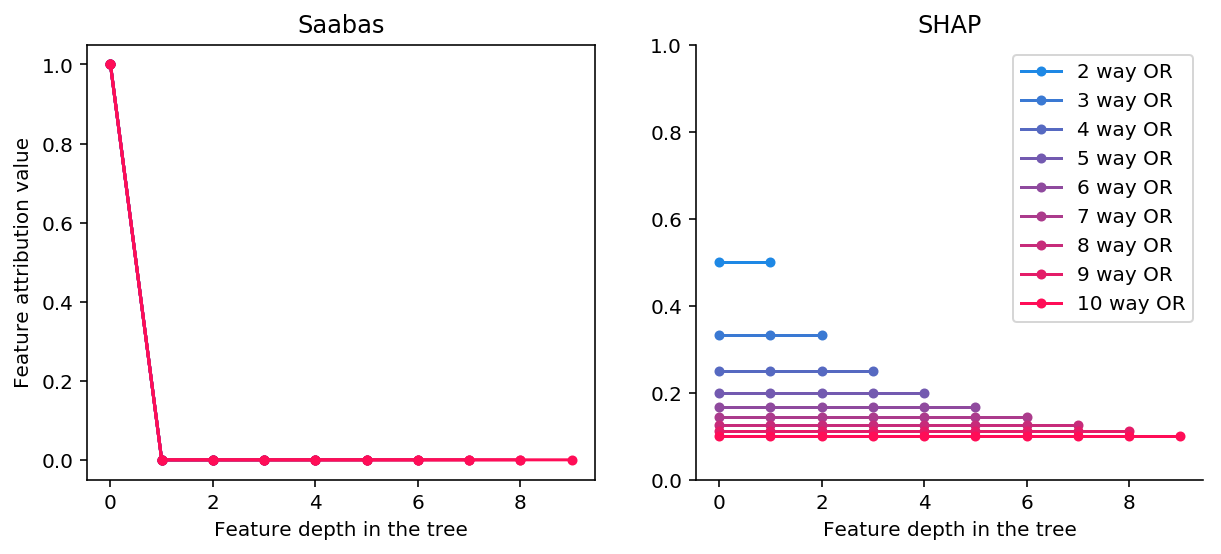

In [37]:
# fit model
saabas_values_arr = []
shap_values_arr = []
for i in range(2,11):
    X,y = multiwayor(or_size=i, extra_features=10-i)
    y[y == 0] = -y.sum()/(y == 0).sum()
    model = sklearn.tree.DecisionTreeRegressor(max_depth=i)
    model.fit(X, y)
    
#     print(y.mean())

    shap_values = shap.TreeExplainer(model).shap_values(X[0:1,:])
    shap_values_arr.append(shap_values)
    saabas_values = shap.TreeExplainer(model).shap_values(X[0:1,:], approximate=True)
    saabas_values_arr.append(saabas_values)
#     print(X[0,:])
#     print("shap", shap.TreeExplainer(model).shap_values(X[0:1,:]))
#     print("saabas", shap.TreeExplainer(model).shap_values(X[0:1,:], approximate=True))

f = pl.figure(figsize=(10,4))
pl.subplot(1,2,1)
for i in range(len(saabas_values_arr)):
    pl.plot(
        list(range(0,i+2)), -np.array(sorted(-saabas_values_arr[i][0,:i+2])), ".-",
        markersize=8, label=str(i+2)+" way OR",
        color=shap.plots.colors.red_blue_solid(i * 1.0/8)
    )
pl.ylabel("Feature attribution value")    
pl.xlabel("Feature depth in the tree") 
#pl.legend()
pl.title("Saabas")

pl.subplot(1,2,2) 
for i in range(len(shap_values_arr)):
    pl.plot(
        list(range(0,i+2)), sorted(shap_values_arr[i][0,:i+2]), ".-",
        markersize=8, label=str(i+2)+" way OR",
        color=shap.plots.colors.red_blue_solid(i * 1.0/8)
    )
pl.xlabel("Feature depth in the tree")
pl.legend()
pl.gca().xaxis.set_ticks_position('bottom')
pl.gca().yaxis.set_ticks_position('left')
pl.gca().spines['right'].set_visible(False)
pl.gca().spines['top'].set_visible(False)
pl.title("SHAP")
pl.ylim(0,1)
pl.show()